In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

# Foundations

## Basic Function

In [2]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

In [3]:
square(np.array([1,2]))

array([1, 4], dtype=int32)

## Deriv

In [4]:
def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

## Chain

In [5]:
from typing import List

In [6]:
#Bentuk fungsi array berisi ndarray, ndarray
Array_Function = Callable[[ndarray], ndarray]

#List untuk menyampung kumpulan fungsi
Chain = List[Array_Function]

In [7]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''Evaluasi fungsi ada 2'''
    assert len(chain) == 2, \
    "fungsi harus ada 2"
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

## Chain Derivative

In [8]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the two nested function derivation:
    d(f2(f1(x))) = df2(f1(x))*df1(x)
    '''
    
    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    f1 = chain[0]
    f2 = chain[1]
    
    #df1(x)/dx
    df1dx = deriv(f1, input_range)
    
    #df2(x)/df1(x)
    df2df1 = deriv(f2, f1(input_range))
    
    #Multiply those derivations for satisfying chain rule
    return df2df1*df1dx

In [9]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray
    '''
    return 1/(1+np.exp(-x))

In [10]:
def plot_chain(ax, 
               chain: Chain,
               input_range: ndarray) -> ndarray:
    '''
    ax:matplotlib subplotting
    '''
    assert input_range.ndim == 1, \
    'the dim of input_range must 1'
    
    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [11]:
def plot_chain_deriv(ax, 
               chain: Chain,
               input_range: ndarray) -> ndarray:
    '''
    ax:matplotlib subplotting
    '''
    assert input_range.ndim == 1, \
    'the dim of input_range must 1'
    
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

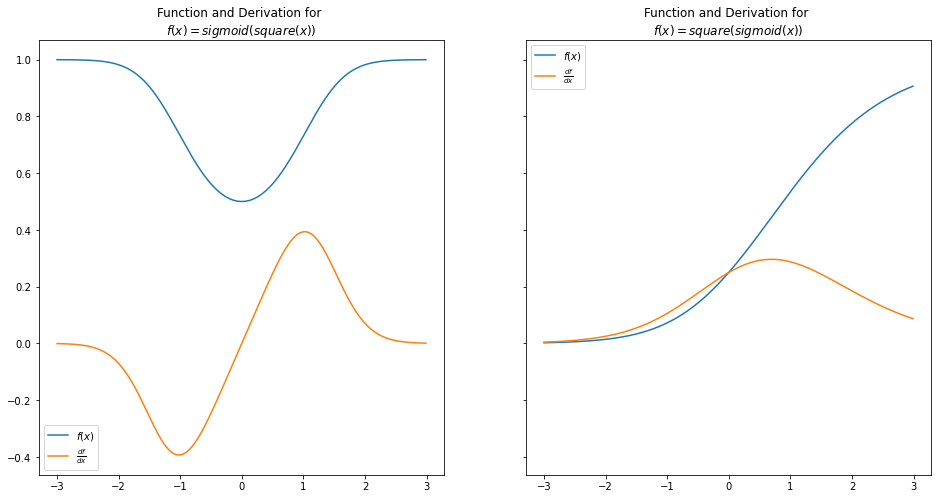

In [12]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_range = np.arange(-3, 3, 0.01)

plot_chain(ax[0], chain_1, plot_range)
plot_chain_deriv(ax[0], chain_1, plot_range)
ax[0].legend(['$f(x)$','$\\frac{df}{dx}$'])
ax[0].set_title("Function and Derivation for \n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, plot_range)
plot_chain_deriv(ax[1], chain_2, plot_range)
ax[1].legend(['$f(x)$','$\\frac{df}{dx}$'])
ax[1].set_title("Function and Derivation for \n$f(x) = square(sigmoid(x))$")

plt.show()

## Function with multiple inputs

In [13]:
def multiple_inputs_add(x: ndarray, 
                        y: ndarray,
                        sigma: Array_Function) -> ndarray:
    '''
    x and y must same dim
    '''
    assert x.shape == y.shape
    
    a = x+y
    return sigma(a)

## Function with Multiple Vectors Input

In [14]:
def matmul_forward(X: ndarray, 
                   W: ndarray) -> ndarray:
    assert X.shape[1] == W.shape[0]
    N = np.dot(X, W)
    return N

## Derivative of Functions and Their Derivatives: One step further
N = w_1x_1 + ...

In [15]:
def matmul_backward_first(X: ndarray, 
                          W: ndarray) -> ndarray:
    dNdX = np.transpose(W, (1,0)) #row vector
    return dNdX

## Vector Functions and Their Derivatives: One Step Further

$f(X,W) = \sigma(\nu(X,W))$

In [16]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray, 
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix 
    multiplication, one extra function
    '''
    
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    return S

## Vector Functions and Their Derivatives: The Backward Pass

If $f(X,W) = \sigma(\nu(V,W))$, its derivative with respect to X shoud conceptually be:

$\frac{\partial f}{\partial X} = \frac{\partial \sigma}{\partial \nu}.\frac{\partial \nu}{\partial X}$

with $\nu = w_1.x_1 + w_2.x_2 + ...$, we can describe more detail:

$=> \frac{\partial \nu}{\partial X} = W^T$

$=> \frac{\partial f}{\partial X} = \frac{\partial \sigma}{\partial \nu}.W^T$

In [18]:
def matrix_function_backward_1(X: ndarray, 
                               W: ndarray, 
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of or matrix function with respect 
    to the first elemet
    '''
    
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = np.dot(X,W) # N is similiar to \nu
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    # backward calculation (d\sigma/d\nu)
    dSdN = deriv(sigma, N)
    
    # d\nudX or dN/dX
    dNdX = np.transpose(W, (1,0))
    
    # multiply them together
    return np.dot(dSdN, dNdX)

## Computational Graph with Two 2D Matrix Inputs

Example, we have:

$X = \begin{pmatrix}
x_{11} &  x_{12} & x_{13}\\
x_{21} & x_{22} & x_{23}\\
x_{31} & x_{32} & x_{33}
\end{pmatrix}$

and

$W = \begin{pmatrix}
w_{11} &  w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} 
\end{pmatrix}$

multiply them :

$X \times W = \begin{pmatrix}
X_{1j}W_{i1} &  X_{1j}W_{i2}\\
X_{2j}W_{i1} & X_{2j}W_{i2}\\
X_{3j}W_{i1} & X_{3j}W_{i2}
\end{pmatrix}$

We'll feed this result through $\sigma$:

$\sigma(X \times W) = \begin{pmatrix}
\sigma(X_{1i}W_{i1}) &  \sigma(X_{1i}W_{i2})\\
\sigma(X_{2i}W_{i1}) & \sigma(X_{2i}W_{i2})\\
\sigma(X_{3i}W_{i1}) & \sigma(X_{3i}W_{i2})
\end{pmatrix}$

Let's we have Lambda function that simply the elements of $\sigma$ and sums them up.

$L = \Lambda(\sigma(X \times W)) \\
   = \sigma(X_{1i}W_{i1}) +  \sigma(X_{2i}W_{i1}) + \sigma(X_{3i}W_{i1}) + \sigma(X_{1i}W_{i2}) + \sigma(X_{2i}W_{i2}) + \sigma(X_{3i}W_{i2})$

In [19]:
def matrix_function_forward_sum(X: ndarray, 
                                W: ndarray, 
                                sigma: Array_Function) -> ndarray:
    '''
    Compute the result of the forward pass of this function with 
    input ndarrays X and W and function sigma
    '''
    
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    # sum all the elements
    L = np.sum(S)
    
    return L